In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:


path='/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/' #difining path of images

path1='/content/drive/MyDrive/Colab Notebooks/dataset/augmented/mask/' #difining path of mask

#path3='/content/drive/MyDrive/Colab Notebooks/dataset/augmented/mask_update' #difining path of mask

In [3]:
## Making essential imports
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [4]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-x0l1yzdl
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-x0l1yzdl
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33810 sha256=32f38147c4b2abb14a297fc36d664223bcfd4a06467e5d5ebb0c7e8dff3b6799
  Stored in directory: /tmp/pip-ephem-wheel-cache-us5009n1/wheels/02/cd/18/61c0bbb8766acfec68f9d20618886b7b38dfeeb95865b6ba00
Successfully built segmentation-models


In [5]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [6]:
import keras
print(keras.__version__)
import tensorflow as tf

2.8.0


In [7]:
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import keras 

from tensorflow.keras.utils import normalize
from keras.metrics import MeanIoU

In [8]:
#Resizing images, if needed
SIZE_X = 256 
SIZE_Y = 256
n_classes=5 #Number of classes for segmentation

#Capture training image info as a list
train_images = []

image_names = glob.glob("/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/*.png")
image_names.sort()
print(image_names)

images = [cv2.imread(image, 1) for image in image_names] 
train_images = np.array(images)
 

['/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image0.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image1.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image10.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image100.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image101.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image102.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image103.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image104.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image105.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image106.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image107.png', '/content/drive/MyDrive/Colab Notebooks/dataset/augmented/images/image108.png', '/content/drive/MyDrive/Colab Notebooks/data

In [9]:
print(train_images.shape)

(501, 256, 256, 3)


In [10]:
mask_names = glob.glob("/content/drive/MyDrive/Colab Notebooks/dataset/augmented/mask/*.png")
mask_names.sort()

In [11]:
      
#Convert list to array for machine learning processing        
#train_images = np.array(train_images)
train_masks=[]
#Capture mask/label info as a list
masks = [cv2.imread(mask, 1) for mask in mask_names]
train_masks = np.array(masks)
#Convert list to array for machine learning processing          
#train_masks = np.array(train_masks)
print(train_masks.shape)
###############################################

(501, 256, 256, 3)


In [12]:
print(train_masks[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 28 219 235]
  [ 28 219 235]
  [ 28 219 235]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 28 219 235]
  [ 28 219 235]
  [ 28 219 235]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [ 28 219 235]
  [ 28 219 235]
  [ 28 219 235]]

 ...

 [[255  50   0]
  [255  50   0]
  [255  50   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[255  50   0]
  [255  50   0]
  [255  50   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[255  50   0]
  [255  50   0]
  [255  50   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]]


In [13]:
print(np.unique(train_masks[0]))

[  0   1   2   3   4   5  12  14  15  19  20  22  23  27  28  29  32  33
  34  37  38  39  40  43  45  46  49  50  53  59  64  75  95 102 104 105
 108 110 114 124 128 130 141 142 147 148 156 159 163 166 167 178 182 185
 187 188 192 197 199 200 203 208 209 210 211 213 216 219 221 222 226 227
 229 230 234 235 236 237 238 241 244 247 248 251 254 255]


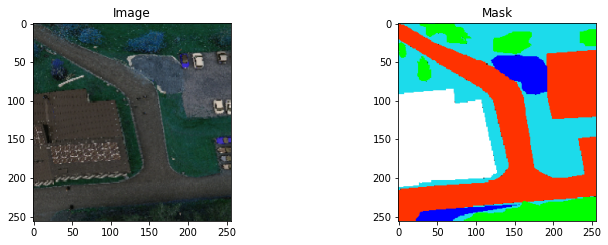

In [14]:
import random
img_number = random.randint(0, len(train_images)-1)
img = train_images[img_number]
mask = train_masks[img_number]
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Mask')
plt.imshow(mask)
plt.show()

In [15]:
building= 255
paved_area = 203
dirt = 150
grass = 76
road = 58

In [16]:
building= str([255,255,255])
paved_area = str([28,219,235])
dirt = str([0,0,255])
grass = str([0,255,0])
road = str([255,50,0])

In [17]:
labels = {building:0, paved_area:1, dirt:2, grass:3, road:4}
print(labels)

{'[255, 255, 255]': 0, '[28, 219, 235]': 1, '[0, 0, 255]': 2, '[0, 255, 0]': 3, '[255, 50, 0]': 4}


In [18]:
print(np.unique(train_masks[0]))

[  0   1   2   3   4   5  12  14  15  19  20  22  23  27  28  29  32  33
  34  37  38  39  40  43  45  46  49  50  53  59  64  75  95 102 104 105
 108 110 114 124 128 130 141 142 147 148 156 159 163 166 167 178 182 185
 187 188 192 197 199 200 203 208 209 210 211 213 216 219 221 222 226 227
 229 230 234 235 236 237 238 241 244 247 248 251 254 255]


In [19]:
width = train_masks[0].shape[1]
height = train_masks[0].shape[0]

train_masks_encoded=[]

for p in range(0,501):

    values = [str(list(train_masks[p][i,j])) for i in range(height) for j in range(width)]
    #print(values)

    #print(len(values))


    mask=list([0]*width*height)
    for i, value in enumerate(values):
      try:
        mask[i]=labels[value]
      except:
        mask[i]=0

    mask = np.asarray(mask).reshape(height,width)
    train_masks_encoded.append(mask)

#print(mask)

In [20]:
print(np.unique(train_masks_encoded[0]))

[0 1 2 3 4]


In [21]:
train_masks_encoded = np.array(train_masks_encoded)
print(train_masks_encoded.shape)

(501, 256, 256)


In [22]:
#################################################
#train_images = np.expand_dims(train_images, axis=3)
#train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks_encoded, axis=3)
train_images_input = normalize(train_images, axis=1)

#Create a subset of data for quick testing
#Picking 10% for testing and remaining for training
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)

#Further split training data t a smaller subset for quick testing of models
X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.5, random_state = 0)

print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled 

from tensorflow.keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))



test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

######################################################
#Reused parameters in all models

Class values in the dataset are ...  [0 1 2 3 4]


In [23]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8794 sha256=9d90fccd5df0e22935065183ad6a375ddf0f47e116f9ba6b0a362395802ea7a3
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7878 sha256=b0c701741bc287fe6d013a5fd3146f7a3c35bad0ec63462749b4017146ff489a
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4588 sha256=50759cfb8082cab6a9f330e80f6c177360d655ead753803a5503c077d8ec4611
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [24]:
######################################################
#Reused parameters in all models
import tensorflow

n_classes=5
activation='softmax'

LR = 0.0001
optim = tensorflow.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.20, 0.20, 0.20, 0.20, 0.20])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]


########################################################################

In [25]:
 earlystop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=1, min_lr=0.00001)

In [26]:
########################################################################
###Model 1
BACKBONE1 = 'resnet34'
preprocess_input1 = sm.get_preprocessing(BACKBONE1)

# preprocess input
X_train1 = preprocess_input1(X_train)
X_test1 = preprocess_input1(X_test)

# define model
model1 = sm.Unet(BACKBONE1, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
#model1.compile(optim, total_loss, metrics='accuracy')

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

print(model1.summary())




85532672/85521592 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['bn_data[0][0]']                
                           

In [27]:
history1=model1.fit(X_train1, 
          y_train_cat,
          batch_size=8, 
          epochs=30,
          verbose=1,
          validation_data=(X_test1, y_test_cat),
          callbacks=[ earlystop,reduce_lr])


model1.save('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/res34_backbone_50epochs.hdf5')
############################################################
###Model 2

Epoch 1/30
29/29 [==============================] - 40s 541ms/step - loss: 0.8132 - accuracy: 0.7167 - val_loss: 14.7742 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 2/30
29/29 [==============================] - 11s 384ms/step - loss: 0.3210 - accuracy: 0.8858 - val_loss: 28.0794 - val_accuracy: 0.3926 - lr: 0.0010
Epoch 3/30
29/29 [==============================] - 11s 384ms/step - loss: 0.2428 - accuracy: 0.9053 - val_loss: 37.6246 - val_accuracy: 0.5894 - lr: 2.0000e-04
Epoch 4/30
29/29 [==============================] - 11s 382ms/step - loss: 0.2255 - accuracy: 0.9095 - val_loss: 14.9529 - val_accuracy: 0.6270 - lr: 4.0000e-05
Epoch 5/30
29/29 [==============================] - 11s 384ms/step - loss: 0.2254 - accuracy: 0.9093 - val_loss: 1.1079 - val_accuracy: 0.7746 - lr: 1.0000e-05
Epoch 6/30
29/29 [==============================] - 11s 383ms/step - loss: 0.2232 - accuracy: 0.9101 - val_loss: 0.4629 - val_accuracy: 0.8404 - lr: 1.0000e-05
Epoch 7/30
29/29 [==========================

2/2 [==============================] - 7s 3s/step - loss: 0.1959 - accuracy: 0.9171


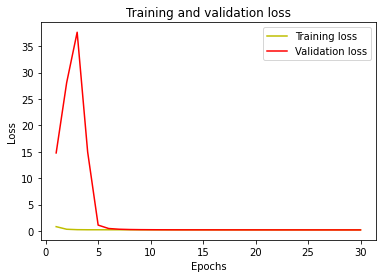

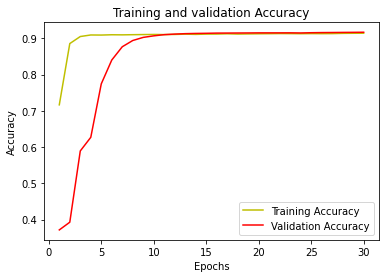

In [28]:
############################################################
#Evaluate the model
	# evaluate model
acc = model1.evaluate(X_test1, y_test_cat)
#print("Accuracy is = ",(acc * 100.0))


###
#plot the training and validation accuracy and loss at each epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [30]:
np.save('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/my_history.npy',history1.history)

In [55]:
history1=np.load('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/my_history.npy',allow_pickle='TRUE').item()

In [64]:
his1=[]
his2=[]
his3=[]
his4=[]
for i,j in enumerate(zip(history1['val_loss'],history1['loss'],history1['accuracy'],history1['val_accuracy'])):
    print (i,j)
    if j[0]<=7.0:
      his1.append(j[0])
      his2.append(j[1])
      his3.append(j[2])
      his4.append(j[3])
print(his1)
print(his2)
print(his3)
print(his4)


0 (14.774212837219238, 0.8131541013717651, 0.7166866660118103, 0.371323823928833)
1 (28.079402923583984, 0.3209587633609772, 0.8857970237731934, 0.3926074504852295)
2 (37.6246452331543, 0.24279657006263733, 0.905268132686615, 0.5893809199333191)
3 (14.952868461608887, 0.2254815548658371, 0.9095374941825867, 0.6269833445549011)
4 (1.107853889465332, 0.22538577020168304, 0.9093095064163208, 0.7746186852455139)
5 (0.4628932476043701, 0.22320210933685303, 0.9101298451423645, 0.8403535485267639)
6 (0.32577866315841675, 0.22278368473052979, 0.9098841547966003, 0.8770123720169067)
7 (0.27117133140563965, 0.22134563326835632, 0.9103241562843323, 0.8942796587944031)
8 (0.24506226181983948, 0.21984657645225525, 0.9106845855712891, 0.9028933644294739)
9 (0.23236311972141266, 0.21809056401252747, 0.9109528660774231, 0.9071308374404907)
10 (0.22203901410102844, 0.2195337414741516, 0.9106301665306091, 0.9104201197624207)
11 (0.2163640409708023, 0.21761605143547058, 0.9109912514686584, 0.912012457847

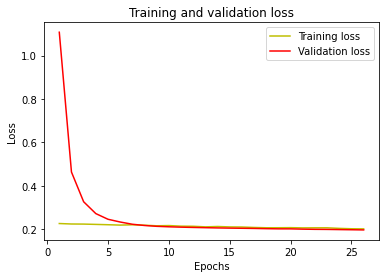

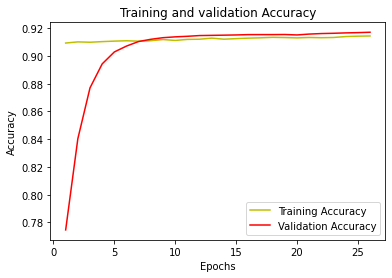

In [65]:
###
#plot the training and validation accuracy and loss at each epoch
loss = his2
val_loss = his1
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = his3
val_acc = his4

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [66]:
############################################################
###Model 2

BACKBONE2 = 'inceptionv3'
preprocess_input2 = sm.get_preprocessing(BACKBONE2)

# preprocess input
X_train2 = preprocess_input2(X_train)
X_test2 = preprocess_input2(X_test)

# define model
model2 = sm.Unet(BACKBONE2, encoder_weights='imagenet', classes=n_classes, activation=activation)


# compile keras model with defined optimozer, loss and metrics
#model2.compile(optim, total_loss, metrics)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


print(model2.summary())



87924736/87910968 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                

In [67]:
history2=model2.fit(X_train2, 
          y_train_cat,
          batch_size=8, 
          epochs=30,
          verbose=1,
          validation_data=(X_test2, y_test_cat))


model2.save('/content/drive/MyDrive/Colab Notebooks/dataset/inceptionv3_backbone_50epochs.hdf5')

Epoch 1/30
29/29 [==============================] - 43s 849ms/step - loss: 0.6161 - accuracy: 0.7962 - val_loss: 3.4761 - val_accuracy: 0.4159
Epoch 2/30
29/29 [==============================] - 15s 517ms/step - loss: 0.2405 - accuracy: 0.9219 - val_loss: 2.3974 - val_accuracy: 0.6034
Epoch 3/30
29/29 [==============================] - 15s 515ms/step - loss: 0.1923 - accuracy: 0.9362 - val_loss: 1.1192 - val_accuracy: 0.7314
Epoch 4/30
29/29 [==============================] - 15s 514ms/step - loss: 0.1624 - accuracy: 0.9447 - val_loss: 1.0268 - val_accuracy: 0.7630
Epoch 5/30
29/29 [==============================] - 15s 513ms/step - loss: 0.1446 - accuracy: 0.9500 - val_loss: 0.6056 - val_accuracy: 0.8145
Epoch 6/30
29/29 [==============================] - 15s 512ms/step - loss: 0.1272 - accuracy: 0.9557 - val_loss: 0.2900 - val_accuracy: 0.9022
Epoch 7/30
29/29 [==============================] - 15s 513ms/step - loss: 0.1251 - accuracy: 0.9560 - val_loss: 0.4344 - val_accuracy: 0.8764

2/2 [==============================] - 8s 4s/step - loss: 0.7478 - accuracy: 0.8275


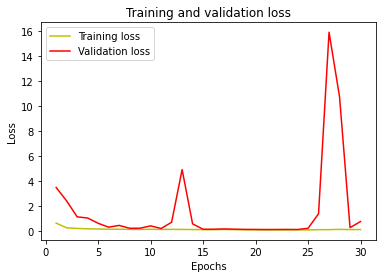

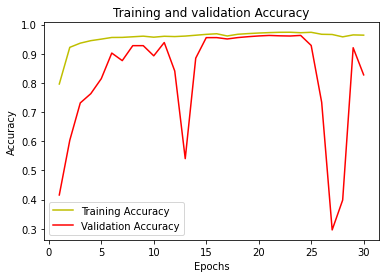

In [68]:
############################################################
#Evaluate the model
	# evaluate model
acc = model2.evaluate(X_test2, y_test_cat)
#print("Accuracy is = ",(acc * 100.0))


###
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [70]:
np.save('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/my_history1.npy',history2.history)

In [71]:
history2=np.load('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/my_history1.npy',allow_pickle='TRUE').item()

In [72]:
his1=[]
his2=[]
his3=[]
his4=[]
for i,j in enumerate(zip(history2['val_loss'],history2['loss'],history2['accuracy'],history2['val_accuracy'])):
    print (i,j)
    if j[0]<=3.0:
      his1.append(j[0])
      his2.append(j[1])
      his3.append(j[2])
      his4.append(j[3])
print(his1)
print(his2)
print(his3)
print(his4)


0 (3.4761059284210205, 0.6160760521888733, 0.7961935997009277, 0.4159303605556488)
1 (2.397426128387451, 0.2405436635017395, 0.9218841791152954, 0.6034480333328247)
2 (1.1191837787628174, 0.19233861565589905, 0.9362167716026306, 0.7313968539237976)
3 (1.0268003940582275, 0.16239909827709198, 0.9447126984596252, 0.7629894018173218)
4 (0.6056121587753296, 0.14458289742469788, 0.9500171542167664, 0.8144725561141968)
5 (0.2899759113788605, 0.12717467546463013, 0.9556813836097717, 0.9022324681282043)
6 (0.434356153011322, 0.12505289912223816, 0.9559851288795471, 0.8763514757156372)
7 (0.20390643179416656, 0.11761092394590378, 0.9580258727073669, 0.9276272654533386)
8 (0.21022774279117584, 0.11203412711620331, 0.9601468443870544, 0.9276248812675476)
9 (0.3980708122253418, 0.12203129380941391, 0.9566523432731628, 0.8928019404411316)
10 (0.1845797896385193, 0.11278141289949417, 0.9597760438919067, 0.9383607506752014)
11 (0.6888201236724854, 0.11629302054643631, 0.9587478041648865, 0.8407545089

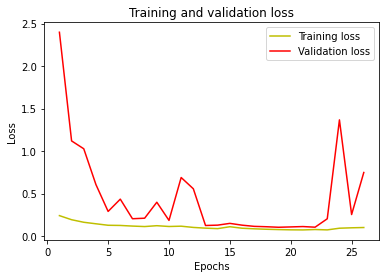

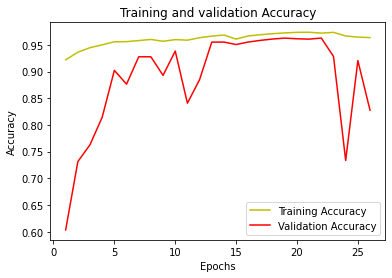

In [73]:
###
#plot the training and validation accuracy and loss at each epoch
loss = his2
val_loss = his1
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = his3
val_acc = his4

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [74]:
#####################################################
###Model 3

BACKBONE3 = 'vgg16'
preprocess_input3 = sm.get_preprocessing(BACKBONE3)

# preprocess input
X_train3 = preprocess_input3(X_train)
X_test3 = preprocess_input3(X_test)


# define model
model3 = sm.Unet(BACKBONE3, encoder_weights='imagenet', classes=n_classes, activation=activation)

# compile keras model with defined optimozer, loss and metrics
#model3.compile(optim, total_loss, metrics)
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


print(model3.summary())



##########################################################

58900480/58889256 [==============================] - 3s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_2[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                           

In [75]:
history3=model3.fit(X_train3, 
          y_train_cat,
          batch_size=8, 
          epochs=30,
          verbose=1,
          validation_data=(X_test3, y_test_cat))


model3.save('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/vgg19_backbone_50epochs.hdf5')


Epoch 1/30
29/29 [==============================] - 34s 828ms/step - loss: 0.7566 - accuracy: 0.7349 - val_loss: 5.2352 - val_accuracy: 0.4112
Epoch 2/30
29/29 [==============================] - 18s 615ms/step - loss: 0.3558 - accuracy: 0.8743 - val_loss: 3.0547 - val_accuracy: 0.4050
Epoch 3/30
29/29 [==============================] - 18s 613ms/step - loss: 0.2981 - accuracy: 0.8986 - val_loss: 1.4621 - val_accuracy: 0.4651
Epoch 4/30
29/29 [==============================] - 19s 654ms/step - loss: 0.2529 - accuracy: 0.9137 - val_loss: 1.0046 - val_accuracy: 0.7310
Epoch 5/30
29/29 [==============================] - 18s 612ms/step - loss: 0.2304 - accuracy: 0.9213 - val_loss: 0.4503 - val_accuracy: 0.8204
Epoch 6/30
29/29 [==============================] - 18s 612ms/step - loss: 0.2309 - accuracy: 0.9194 - val_loss: 0.4569 - val_accuracy: 0.8086
Epoch 7/30
29/29 [==============================] - 18s 612ms/step - loss: 0.2055 - accuracy: 0.9286 - val_loss: 0.3472 - val_accuracy: 0.8647

2/2 [==============================] - 26s 10s/step - loss: 0.2194 - accuracy: 0.9182


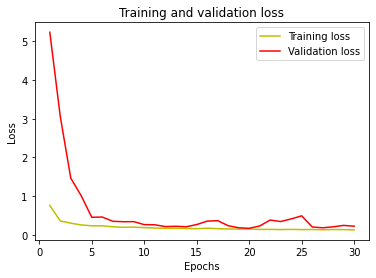

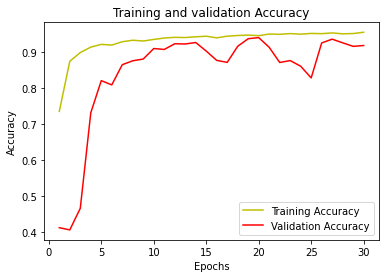

In [76]:
############################################################
#Evaluate the model
	# evaluate model
acc = model3.evaluate(X_test3, y_test_cat)
#print("Accuracy is = ",(acc * 100.0))


###
#plot the training and validation accuracy and loss at each epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [77]:
np.save('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/my_history2.npy',history3.history)

In [78]:
history3=np.load('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/my_history2.npy',allow_pickle='TRUE').item()

In [80]:
his1=[]
his2=[]
his3=[]
his4=[]
for i,j in enumerate(zip(history3['val_loss'],history3['loss'],history3['accuracy'],history3['val_accuracy'])):
    print (i,j)
    if j[0]<=3.0:
      his1.append(j[0])
      his2.append(j[1])
      his3.append(j[2])
      his4.append(j[3])
print(his1)
print(his2)
print(his3)
print(his4)


0 (5.235208511352539, 0.7565983533859253, 0.7348714470863342, 0.41118964552879333)
1 (3.054699659347534, 0.35580793023109436, 0.8743215203285217, 0.40498650074005127)
2 (1.4620636701583862, 0.29813310503959656, 0.8985713720321655, 0.46508368849754333)
3 (1.0046186447143555, 0.25290870666503906, 0.9137146472930908, 0.7310048937797546)
4 (0.45029416680336, 0.23038186132907867, 0.9213231801986694, 0.8204058408737183)
5 (0.4569454491138458, 0.23094099760055542, 0.919378936290741, 0.8086021542549133)
6 (0.3472064137458801, 0.20546141266822815, 0.9286392331123352, 0.8647478818893433)
7 (0.3361734449863434, 0.19126756489276886, 0.9328474402427673, 0.8756660223007202)
8 (0.33821696043014526, 0.19591262936592102, 0.9306703209877014, 0.880558967590332)
9 (0.2610457241535187, 0.18297626078128815, 0.9350464344024658, 0.9097747802734375)
10 (0.25690191984176636, 0.17223131656646729, 0.939030110836029, 0.9071637392044067)
11 (0.21097710728645325, 0.1659890115261078, 0.9408515691757202, 0.92298889160

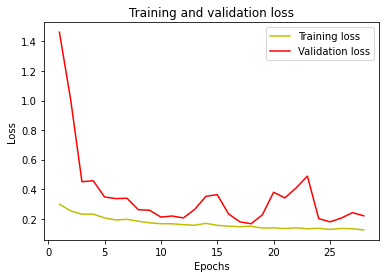

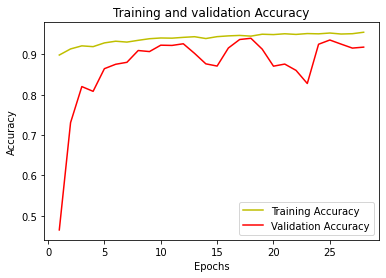

In [81]:
###
#plot the training and validation accuracy and loss at each epoch
loss = his2
val_loss = his1
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = his3
val_acc = his4

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [82]:
#####################################################

from keras.models import load_model

#Set compile=False as we are not loading it for training, only for prediction.
#model1 = load_model('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/res34_backbone_50epochs.hdf5', compile=False)
#model2 = load_model('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/inceptionv3_backbone_50epochs.hdf5', compile=False)
#model3 = load_model('/content/drive/MyDrive/Colab Notebooks/dataset/augmented/vgg19_backbone_50epochs.hdf5', compile=False)

###Model 1
BACKBONE1 = 'resnet34'
preprocess_input1 = sm.get_preprocessing(BACKBONE1)

# preprocess input
X_train1 = preprocess_input1(X_train)
X_test1 = preprocess_input1(X_test)




BACKBONE2 = 'inceptionv3'
preprocess_input2 = sm.get_preprocessing(BACKBONE2)

# preprocess input
X_train2 = preprocess_input2(X_train)
X_test2 = preprocess_input2(X_test)

BACKBONE3 = 'vgg16'
preprocess_input3 = sm.get_preprocessing(BACKBONE3)

# preprocess input
X_train3 = preprocess_input3(X_train)
X_test3 = preprocess_input3(X_test)

#Weighted average ensemble
models = [model1, model2, model3]
#preds = [model.predict(X_test) for model in models]

pred1 = model1.predict(X_test1)
pred2 = model2.predict(X_test2)
pred3 = model3.predict(X_test3)
print(pred1,pred2,pred3)

preds=np.array([pred1, pred2, pred3])

#preds=np.array(preds)
weights = [0.4, 0.5, 0.1]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=3)

y_pred1_argmax=np.argmax(pred1, axis=3)
y_pred2_argmax=np.argmax(pred2, axis=3)
y_pred3_argmax=np.argmax(pred3, axis=3)

[[[[1.51812613e-01 2.32193395e-01 9.34617072e-02 4.05506790e-01
    1.17025442e-01]
   [1.36358842e-01 1.91800684e-01 6.51622117e-02 5.72436869e-01
    3.42414565e-02]
   [7.58718401e-02 1.38934135e-01 4.98268604e-02 7.04266906e-01
    3.11002862e-02]
   ...
   [1.05078302e-01 5.21472871e-01 2.02093959e-01 6.72411695e-02
    1.04113713e-01]
   [1.86913028e-01 4.17393595e-01 1.75173625e-01 7.64982849e-02
    1.44021481e-01]
   [2.27458000e-01 3.30657661e-01 1.46158770e-01 1.51079446e-01
    1.44646123e-01]]

  [[9.12766084e-02 2.10083559e-01 5.32312617e-02 5.73821843e-01
    7.15867504e-02]
   [5.51677160e-02 1.81671113e-01 1.89007819e-02 7.25500286e-01
    1.87600609e-02]
   [4.33465317e-02 1.38512477e-01 1.80093609e-02 7.80266225e-01
    1.98653899e-02]
   ...
   [5.34598380e-02 4.57618892e-01 2.46674672e-01 5.47368824e-02
    1.87509745e-01]
   [1.03393912e-01 4.25841928e-01 1.69657320e-01 6.17417283e-02
    2.39365131e-01]
   [1.75957099e-01 3.32206875e-01 1.74254060e-01 8.69979188e

In [83]:
print(X_train1.shape)
print(pred1.shape)

(225, 256, 256, 3)
(51, 256, 256, 5)


In [84]:
#Using built in keras function
n_classes = 5
IOU1 = MeanIoU(num_classes=n_classes)  
IOU2 = MeanIoU(num_classes=n_classes)  
IOU3 = MeanIoU(num_classes=n_classes)  
IOU_weighted = MeanIoU(num_classes=n_classes)  

IOU1.update_state(y_test[:,:,:,0], y_pred1_argmax)
IOU2.update_state(y_test[:,:,:,0], y_pred2_argmax)
IOU3.update_state(y_test[:,:,:,0], y_pred3_argmax)
IOU_weighted.update_state(y_test[:,:,:,0], weighted_ensemble_prediction)


print('IOU Score for model1 = ', IOU1.result().numpy())
print('IOU Score for model2 = ', IOU2.result().numpy())
print('IOU Score for model3 = ', IOU3.result().numpy())
print('IOU Score for weighted average ensemble = ', IOU_weighted.result().numpy())
###########################################

IOU Score for model1 =  0.7058128
IOU Score for model2 =  0.6165973
IOU Score for model3 =  0.8180299
IOU Score for weighted average ensemble =  0.7215353


In [85]:
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 4):
    for w2 in range(0,4):
        for w3 in range(0,4):
            wts = [w1/10.,w2/10.,w3/10.]
            
            IOU_wted = MeanIoU(num_classes=n_classes) 
            wted_preds = np.tensordot(preds, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds, axis=3)
            IOU_wted.update_state(y_test[:,:,:,0], wted_ensemble_pred)
            print("Now predciting for weights :", w1/10., w2/10., w3/10., " : IOU = ", IOU_wted.result().numpy())
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'IOU': IOU_wted.result().numpy()}, index=[0]), ignore_index=True)
            
max_iou_row = df.iloc[df['IOU'].idxmax()]
print("Max IOU of ", max_iou_row[3], " obained with w1=", max_iou_row[0],
      " w2=", max_iou_row[1], " and w3=", max_iou_row[2])         


#############################################################
opt_weights = [max_iou_row[0], max_iou_row[1], max_iou_row[2]]

#Use tensordot to sum the products of all elements over specified axes.
opt_weighted_preds = np.tensordot(preds, opt_weights, axes=((0),(0)))
opt_weighted_ensemble_prediction = np.argmax(opt_weighted_preds, axis=3)
#######################################################

Now predciting for weights : 0.0 0.0 0.0  : IOU =  0.050373573
Now predciting for weights : 0.0 0.0 0.1  : IOU =  0.8180299
Now predciting for weights : 0.0 0.0 0.2  : IOU =  0.8180299
Now predciting for weights : 0.0 0.0 0.3  : IOU =  0.8180299
Now predciting for weights : 0.0 0.1 0.0  : IOU =  0.6165973
Now predciting for weights : 0.0 0.1 0.1  : IOU =  0.8005665
Now predciting for weights : 0.0 0.1 0.2  : IOU =  0.8317607
Now predciting for weights : 0.0 0.1 0.3  : IOU =  0.8284178
Now predciting for weights : 0.0 0.2 0.0  : IOU =  0.6165973
Now predciting for weights : 0.0 0.2 0.1  : IOU =  0.6671895
Now predciting for weights : 0.0 0.2 0.2  : IOU =  0.8005665
Now predciting for weights : 0.0 0.2 0.3  : IOU =  0.8334669
Now predciting for weights : 0.0 0.3 0.0  : IOU =  0.6165973
Now predciting for weights : 0.0 0.3 0.1  : IOU =  0.6468855
Now predciting for weights : 0.0 0.3 0.2  : IOU =  0.7011577
Now predciting for weights : 0.0 0.3 0.3  : IOU =  0.8005665
Now predciting for wei

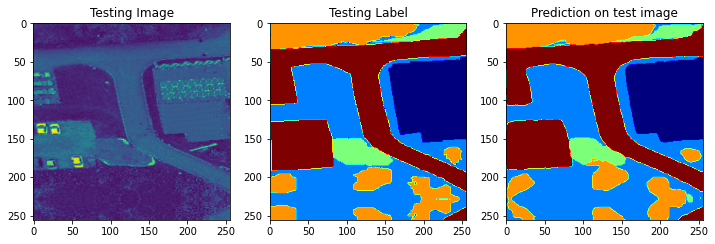

In [86]:
#Predict on a few images

import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img_norm, 0)

#Weighted average ensemble
models = [model1, model2, model3]

test_img_input1 = preprocess_input1(test_img_input)
test_img_input2 = preprocess_input2(test_img_input)
test_img_input3 = preprocess_input3(test_img_input)

test_pred1 = model1.predict(test_img_input1)
test_pred2 = model2.predict(test_img_input2)
test_pred3 = model3.predict(test_img_input3)

test_preds=np.array([test_pred1, test_pred2, test_pred3])

#Use tensordot to sum the products of all elements over specified axes.
weighted_test_preds = np.tensordot(test_preds, opt_weights, axes=((0),(0)))
weighted_ensemble_test_prediction = np.argmax(weighted_test_preds, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(weighted_ensemble_test_prediction, cmap='jet')
plt.show()

#####################################################################

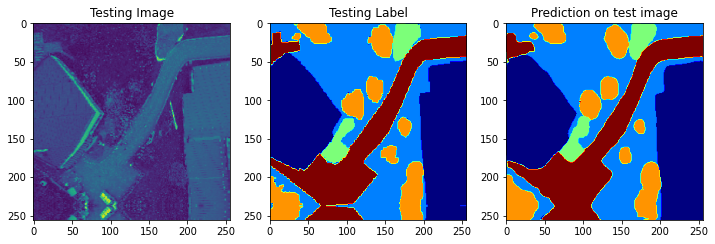

In [87]:
#Predict on a few images

import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img_norm, 0)

#Weighted average ensemble
models = [model1, model2, model3]

test_img_input1 = preprocess_input1(test_img_input)
test_img_input2 = preprocess_input2(test_img_input)
test_img_input3 = preprocess_input3(test_img_input)

test_pred1 = model1.predict(test_img_input1)
test_pred2 = model2.predict(test_img_input2)
test_pred3 = model3.predict(test_img_input3)

test_preds=np.array([test_pred1, test_pred2, test_pred3])

#Use tensordot to sum the products of all elements over specified axes.
weighted_test_preds = np.tensordot(test_preds, opt_weights, axes=((0),(0)))
weighted_ensemble_test_prediction = np.argmax(weighted_test_preds, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(weighted_ensemble_test_prediction, cmap='jet')
plt.show()

#####################################################################

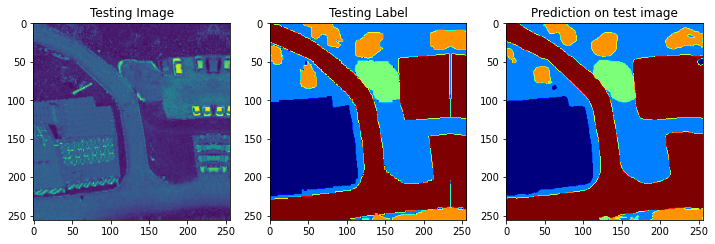

In [88]:
#Predict on a few images

import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,:]
test_img_input=np.expand_dims(test_img_norm, 0)

#Weighted average ensemble
models = [model1, model2, model3]

test_img_input1 = preprocess_input1(test_img_input)
test_img_input2 = preprocess_input2(test_img_input)
test_img_input3 = preprocess_input3(test_img_input)

test_pred1 = model1.predict(test_img_input1)
test_pred2 = model2.predict(test_img_input2)
test_pred3 = model3.predict(test_img_input3)

test_preds=np.array([test_pred1, test_pred2, test_pred3])

#Use tensordot to sum the products of all elements over specified axes.
weighted_test_preds = np.tensordot(test_preds, opt_weights, axes=((0),(0)))
weighted_ensemble_test_prediction = np.argmax(weighted_test_preds, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(weighted_ensemble_test_prediction, cmap='jet')
plt.show()

#####################################################################